# Activity analysis
![activities](data/activities.jpeg)

## Outline
- Objective
- Prediction
- Conclusion 

---
## Objective
The goal of this notebook is to get insight in my activities.  
We will identify by vizualizing the differences in categories and activities spend on time. 

Moreover we will try to predict an activity given a time and the past results. This way you could suggest users activity to form habits.

---
## Setup depencies

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

### Read data

In [2]:
df = pd.read_csv('data/activities.csv')

# Data Exploration

In [3]:
df.shape

(3386, 8)

In [4]:
df.dtypes

activityName              object
activityCategoryName      object
activityStartDate [ms]     int64
activityStartDate         object
activityEndDate [ms]       int64
activityEndDate           object
activityDuration [ms]      int64
activityDuration          object
dtype: object

In [5]:
df.head(10)

,activityName,activityCategoryName,activityStartDate [ms],activityStartDate,activityEndDate [ms],activityEndDate,activityDuration [ms],activityDuration
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,596554,9 min
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,2950509,49 min
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,26637950,7 h 23 min
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,491019,8 min
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,495128,8 min
5,Moving - youtube,Transport,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,87980,1 min
6,Clean,Personal Hygiene,1540190532145,Mon Oct 22 08:42:12 GMT+02:00 2018,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1371581,22 min
7,Food,Feeding,1540191903726,Mon Oct 22 09:05:03 GMT+02:00 2018,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1649400,27 min
8,Moving - youtube,Transport,1540193553126,Mon Oct 22 09:32:33 GMT+02:00 2018,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1267657,21 min
9,Moving - youtube,Transport,1540194820783,Mon Oct 22 09:53:40 GMT+02:00 2018,1540195000783,Mon Oct 22 09:56:40 GMT+02:00 2018,180000,3 min


In [6]:
df.tail(10)

,activityName,activityCategoryName,activityStartDate [ms],activityStartDate,activityEndDate [ms],activityEndDate,activityDuration [ms],activityDuration
3376,Clean,Personal Hygiene,1551212884109,Tue Feb 26 21:28:04 GMT+01:00 2019,1551214324109,Tue Feb 26 21:52:04 GMT+01:00 2019,1440000,24 min
3377,Social - girl,Social - Persist,1551214324109,Tue Feb 26 21:52:04 GMT+01:00 2019,1551215764109,Tue Feb 26 22:16:04 GMT+01:00 2019,1440000,24 min
3378,Sleep,Refresh,1551215764109,Tue Feb 26 22:16:04 GMT+01:00 2019,1551249146378,Wed Feb 27 07:32:26 GMT+01:00 2019,33382269,9 h 16 min
3379,Food - Prepare,Feeding,1551249146378,Wed Feb 27 07:32:26 GMT+01:00 2019,1551250286378,Wed Feb 27 07:51:26 GMT+01:00 2019,1140000,19 min
3380,Food,Feeding,1551250286378,Wed Feb 27 07:51:26 GMT+01:00 2019,1551251227367,Wed Feb 27 08:07:07 GMT+01:00 2019,940989,15 min
3381,Learning - Language,Learning,1551251227367,Wed Feb 27 08:07:07 GMT+01:00 2019,1551252667367,Wed Feb 27 08:31:07 GMT+01:00 2019,1440000,24 min
3382,Social - girl,Social - Persist,1551252667367,Wed Feb 27 08:31:07 GMT+01:00 2019,1551254587367,Wed Feb 27 09:03:07 GMT+01:00 2019,1920000,32 min
3383,Learning - Language,Learning,1551254587367,Wed Feb 27 09:03:07 GMT+01:00 2019,1551255533154,Wed Feb 27 09:18:53 GMT+01:00 2019,945787,15 min
3384,Sport,Sport,1551255533154,Wed Feb 27 09:18:53 GMT+01:00 2019,1551256313154,Wed Feb 27 09:31:53 GMT+01:00 2019,780000,13 min
3385,Clean,Personal Hygiene,1551256313154,Wed Feb 27 09:31:53 GMT+01:00 2019,1551257046239,Wed Feb 27 09:44:06 GMT+01:00 2019,733085,12 min


# Analytical Base Table

## Feature Engineering

Let's take only relevant features into our base table:
- activity, 
- category, 
- start_date_timestamp, 
- start_date,
- end_date_timestamp,
- end_date,
- activity_duration[m]   # minutes

In [7]:
base_table = pd.DataFrame()
base_table['activity'] = df['activityName']
base_table['category'] = df['activityCategoryName']
base_table['start_date[ms]'] = df['activityStartDate [ms]']
base_table['start_date'] = df['activityStartDate']
base_table['end_date[ms]'] = df['activityEndDate [ms]']
base_table['end_date'] = df['activityEndDate']

Lets transform activitiy duration in minutes. Because minutes is a relevant factor for our activitiy analysis.

In [8]:
ms_to_m = 1000 * 60 #milli seconds to minutes
base_table['activityDuration[m]'] = df['activityDuration [ms]'] / ms_to_m
# cast to int (not needed now - we loose here just information)
# base_table['activityDuration[m]'] = base_table['activityDuration[m]'].astype(int)

In [9]:
base_table.dtypes

activity                object
category                object
start_date[ms]           int64
start_date              object
end_date[ms]             int64
end_date                object
activityDuration[m]    float64
dtype: object

In [10]:
base_table.head()

,activity,category,start_date[ms],start_date,end_date[ms],end_date,activityDuration[m]
0,Trello,Personal Adjusting,1540159273005,Mon Oct 22 00:01:13 GMT+02:00 2018,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,9.942567
1,Series / Docu,Entertainment,1540159869559,Mon Oct 22 00:11:09 GMT+02:00 2018,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,49.175150
2,Sleep,Refresh,1540162820068,Mon Oct 22 01:00:20 GMT+02:00 2018,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,443.965833
3,Moving - youtube,Transport,1540189458018,Mon Oct 22 08:24:18 GMT+02:00 2018,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,8.183650
4,Trello,Personal Adjusting,1540189949037,Mon Oct 22 08:32:29 GMT+02:00 2018,1540190444165,Mon Oct 22 08:40:44 GMT+02:00 2018,8.252133


### Distributions of numeric features

Lets plot a histogram of the distribution of numeric features to see ??? 

[]

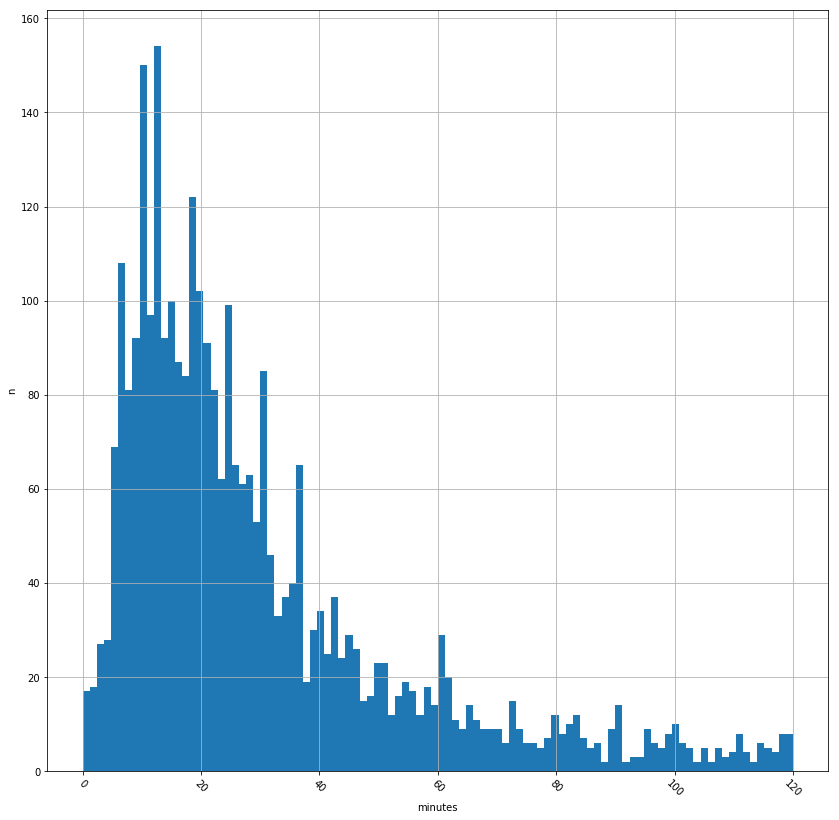

In [31]:
axes = base_table['activityDuration[m]'].hist(xrot=-45, figsize=(14,14),
                                       bins=100, range=(0,120))
axes.set_xlabel("minutes")
axes.set_ylabel("n")
axes.plot()